In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
ncaa = pd.read_csv('../data/ncaa.csv')
ncaa.head(20)

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_qtr,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id
0,1,4.016376e+17,101899901,615,Jumpball,Jump Ball won by South Carolina,0,0,1,1st Quarter,...,NaN,NaN,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
1,2,4.016376e+17,101905501,572,LayUpShot,Chloe Kitts missed Layup.,0,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,22.0,1.0,40.75,3.0,NaN
2,3,4.016376e+17,101905502,587,Defensive Rebound,Kate Martin Defensive Rebound.,0,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
3,4,4.016376e+17,101906101,558,JumpShot,Kate Martin made Three Point Jumper. Assisted ...,3,0,1,1st Quarter,...,1.0,1.0,4898389.0,2024-04-07,2024-04-07 15:00:00,15.0,23.0,-18.75,-10.0,NaN
4,5,4.016376e+17,101907901,558,JumpShot,Raven Johnson missed Jumper.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,19.0,6.0,35.75,6.0,NaN
5,6,4.016376e+17,101907902,587,Defensive Rebound,Caitlin Clark Defensive Rebound.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
6,7,4.016376e+17,101908801,572,LayUpShot,Hannah Stuelke missed Layup.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,28.0,1.0,-40.75,3.0,NaN
7,8,4.016376e+17,101908802,587,Defensive Rebound,Chloe Kitts Defensive Rebound.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
8,9,4.016376e+17,101909901,558,JumpShot,Te-Hina Paopao missed Jumper.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,15.0,26.75,0.0,NaN
9,10,4.016376e+17,101909902,587,Defensive Rebound,Gabbie Marshall Defensive Rebound.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN


In [3]:
ncaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908679 entries, 0 to 1908678
Data columns (total 61 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   game_play_number                 int64  
 1   id                               float64
 2   sequence_number                  int64  
 3   type_id                          int64  
 4   type_text                        object 
 5   text                             object 
 6   away_score                       int64  
 7   home_score                       int64  
 8   period_number                    int64  
 9   period_display_value             object 
 10  clock_display_value              object 
 11  scoring_play                     bool   
 12  score_value                      int64  
 13  team_id                          float64
 14  athlete_id_1                     float64
 15  wallclock                        object 
 16  shooting_play                    bool   
 17  game_id 

In [4]:
ncaa['game_date'].value_counts()

game_date
2023-11-06    50866
2024-03-02    41509
2024-01-27    40433
2024-01-06    39837
2024-02-24    38956
              ...  
2024-03-31      698
2024-04-05      639
2024-04-07      360
2024-03-27      348
2024-04-06      331
Name: count, Length: 146, dtype: int64

In [5]:
ncaa_fouls = ncaa[ncaa['type_text'].isin(['PersonalFoul','Technical Foul'])]
ncaa_fouls.head()

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_qtr,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id
22,23,4.016376e+17,101929501,519,PersonalFoul,Foul on Bree Hall.,10,2,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
35,36,4.016376e+17,101946501,519,PersonalFoul,Foul on Chloe Kitts.,18,9,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
44,45,4.016376e+17,101949501,519,PersonalFoul,Foul on Addison O'Grady.,20,9,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
47,48,4.016376e+17,101955401,519,PersonalFoul,Foul on Sydney Affolter.,20,9,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
55,56,4.016376e+17,101965301,519,PersonalFoul,Foul on Ashlyn Watkins.,20,13,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN


In [6]:
ncaa_fouls['season'].unique()

array([2024])

Need to match the team_id, which is related to the foul, to match either the home_team_name or away_team_name

In [8]:
team_names = []

for index, row in ncaa_fouls.iterrows():
    if row['team_id'] == row['home_team_id']:
        team_names.append(row['home_team_name'])
    elif row['team_id'] == row['away_team_id']:
        team_names.append(row['away_team_name'])

ncaa_fouls['team_id_name'] = team_names

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_48554/4077331367.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_fouls['team_id_name'] = team_names


In [9]:
ncaa_fouls.head(3)

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id,team_id_name
22,23,4.016376e+17,101929501,519,PersonalFoul,Foul on Bree Hall.,10,2,1,1st Quarter,...,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN,South Carolina
35,36,4.016376e+17,101946501,519,PersonalFoul,Foul on Chloe Kitts.,18,9,1,1st Quarter,...,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN,South Carolina
44,45,4.016376e+17,101949501,519,PersonalFoul,Foul on Addison O'Grady.,20,9,1,1st Quarter,...,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN,Iowa


In [10]:
ncaa_fouls[['type_text','text','team_id','home_team_id','home_team_name','away_team_id','away_team_name']]

,type_text,text,team_id,home_team_id,home_team_name,away_team_id,away_team_name
22,PersonalFoul,Foul on Bree Hall.,2579.0,2579,South Carolina,2294,Iowa
35,PersonalFoul,Foul on Chloe Kitts.,2579.0,2579,South Carolina,2294,Iowa
44,PersonalFoul,Foul on Addison O'Grady.,2294.0,2579,South Carolina,2294,Iowa
47,PersonalFoul,Foul on Sydney Affolter.,2294.0,2579,South Carolina,2294,Iowa
55,PersonalFoul,Foul on Ashlyn Watkins.,2579.0,2579,South Carolina,2294,Iowa
...,...,...,...,...,...,...,...
1908644,PersonalFoul,Foul on Ary Dizon.,2934.0,25,California,2934,Cal State Bakersfield
1908647,PersonalFoul,Foul on Kemery Martin.,25.0,25,California,2934,Cal State Bakersfield
1908651,PersonalFoul,Foul on Ary Dizon.,2934.0,25,California,2934,Cal State Bakersfield
1908662,PersonalFoul,Foul on Lulu Laditan-Twidale.,25.0,25,California,2934,Cal State Bakersfield


Who are the top foulers within data set?

In [12]:
technical_fouls = ncaa_fouls[ncaa_fouls['type_text'] == 'Technical Foul']
personal_fouls = ncaa_fouls[ncaa_fouls['type_text'] == 'PersonalFoul']

In [13]:
top_personal_foul_players = personal_fouls['text'].value_counts()
top_personal_foul_players

text
Foul on Jada Williams.         141
Foul on Kennedy Calhoun.       136
Foul on Breya Cunningham.      129
Foul on Ugonne Onyiah.         118
Foul on Emani Burks.           117
                              ... 
Foul on ToniRenee Blanford.      1
Foul on Maddie Guler.            1
Foul on Greta Tollefson.         1
Foul on Jordyn Kahler.           1
Foul on Morgan Baird.            1
Name: count, Length: 6745, dtype: int64

In [14]:
top_personal_foul_teams = personal_fouls['team_id_name'].value_counts()
top_personal_foul_teams

team_id_name
Niagara               750
Saint Louis           706
Kansas City           697
North Dakota State    654
Texas                 653
                     ... 
Arcadia University      8
Cal Maritime            8
Corban University       7
Vtsu Lyndon             6
Saint Rose              6
Name: count, Length: 611, dtype: int64

In [15]:
top_technical_foul_players = technical_fouls['text'].value_counts()
top_technical_foul_players

text
Technical Foul on UCF.                  4
Technical Foul on Sacramento State.     4
Technical Foul on Hampton.              4
Technical Foul on Georgia Southern.     4
Technical Foul on Jacksonville.         4
                                       ..
Technical Foul on Jordan Obi.           1
Technical Foul on Issy Morgan.          1
Technical Foul on Middle Tennessee.     1
Technical Foul on Crystal Henderson.    1
Technical Foul on Montana.              1
Name: count, Length: 591, dtype: int64

In [16]:
top_personal_foul_teams = technical_fouls['team_id_name'].value_counts()
top_personal_foul_teams

team_id_name
Georgia Southern    12
Hampton             11
Old Dominion         9
UCF                  8
South Alabama        8
                    ..
Murray State         1
Georgetown           1
Santa Clara          1
Kansas State         1
Florida National     1
Name: count, Length: 290, dtype: int64

Are there any predictors that a foul is about to occur? 

In [18]:
#https://stackoverflow.com/questions/65041993/how-to-select-the-actual-row-and-the-above-based-on-specific-string-in-pandas
play_before_personal = ncaa.loc[ncaa['type_text'].eq('PersonalFoul')|ncaa['type_text'].eq('PersonalFoul').shift(-1)]
play_before_personal['type_text'].value_counts()

type_text
PersonalFoul          192322
Defensive Rebound      52616
LayUpShot              30749
Offensive Rebound      25186
JumpShot               23799
Steal                  15141
Lost Ball Turnover     12790
MadeFreeThrow          11476
ShortTimeOut            3597
OfficialTVTimeOut       2727
End Period              2061
Dead Ball Rebound        950
RegularTimeOut           811
End Game                 301
Block Shot               266
Jumpball                 151
TipShot                   41
Technical Foul            20
DunkShot                  12
Name: count, dtype: int64

In [19]:
play_before_technical = ncaa.loc[ncaa['type_text'].eq('Technical Foul')|ncaa['type_text'].eq('Technical Foul').shift(-1)]
play_before_technical['type_text'].value_counts()

type_text
Technical Foul        772
PersonalFoul          159
Lost Ball Turnover    106
MadeFreeThrow          98
Defensive Rebound      91
JumpShot               55
Offensive Rebound      49
LayUpShot              46
Steal                  29
OfficialTVTimeOut      28
End Game               20
End Period             11
ShortTimeOut           10
Dead Ball Rebound       4
RegularTimeOut          1
Block Shot              1
Name: count, dtype: int64

In [45]:
timeline = ncaa_fouls.groupby(['type_text', 'period_display_value']).size().reset_index(name='count')
timeline

,type_text,period_display_value,count
0,PersonalFoul,1st Quarter,36745
1,PersonalFoul,2OT,205
2,PersonalFoul,2nd Quarter,44057
3,PersonalFoul,3OT,35
4,PersonalFoul,3rd Quarter,50135
5,PersonalFoul,4OT,18
6,PersonalFoul,4th Quarter,59869
7,PersonalFoul,OT,1258
8,Technical Foul,1st Quarter,77
9,Technical Foul,2nd Quarter,144


In [63]:
timeline['total_fouls'] = timeline.groupby('type_text')['count'].transform('sum')
timeline['percentage'] = (timeline['count'] / timeline['total_fouls']) * 100
timeline

,type_text,period_display_value,count,total_fouls,percentage
0,PersonalFoul,1st Quarter,36745,192322,19.105979
8,Technical Foul,1st Quarter,77,772,9.974093
2,PersonalFoul,2nd Quarter,44057,192322,22.907936
9,Technical Foul,2nd Quarter,144,772,18.652850
4,PersonalFoul,3rd Quarter,50135,192322,26.068261
10,Technical Foul,3rd Quarter,229,772,29.663212
6,PersonalFoul,4th Quarter,59869,192322,31.129564
11,Technical Foul,4th Quarter,312,772,40.414508
7,PersonalFoul,OT,1258,192322,0.654111
12,Technical Foul,OT,10,772,1.295337


In [65]:
sorted_quarters = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter', 'OT', '2OT', '3OT', '4OT']
timeline['period_display_value'] = pd.Categorical(timeline['period_display_value'], sorted_quarters)
timeline = timeline.sort_values('period_display_value')
timeline

,type_text,period_display_value,count,total_fouls,percentage
0,PersonalFoul,1st Quarter,36745,192322,19.105979
8,Technical Foul,1st Quarter,77,772,9.974093
2,PersonalFoul,2nd Quarter,44057,192322,22.907936
9,Technical Foul,2nd Quarter,144,772,18.652850
4,PersonalFoul,3rd Quarter,50135,192322,26.068261
10,Technical Foul,3rd Quarter,229,772,29.663212
6,PersonalFoul,4th Quarter,59869,192322,31.129564
11,Technical Foul,4th Quarter,312,772,40.414508
7,PersonalFoul,OT,1258,192322,0.654111
12,Technical Foul,OT,10,772,1.295337


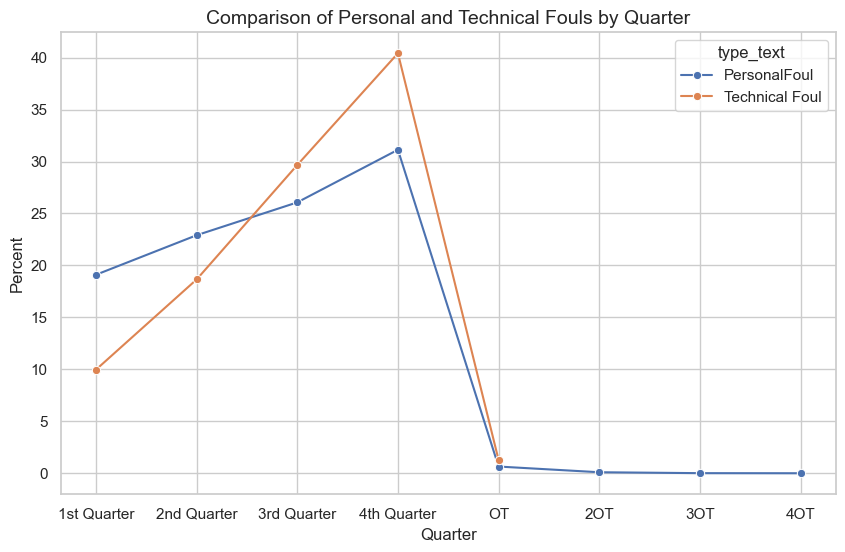

In [69]:
# Set Seaborn theme for better visuals
sns.set(style="whitegrid")

# Plot the line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeline, x='period_display_value', y='percentage', hue='type_text', marker='o')

# Adding labels and title
plt.title('Comparison of Personal and Technical Fouls by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Percent', fontsize=12)

# Show the plot
plt.show()

In [75]:
ncaa_fouls[['type_text','period_display_value','coordinate_x', 'coordinate_y']]                     

,type_text,period_display_value,coordinate_x,coordinate_y
22,PersonalFoul,1st Quarter,41.75,0.0
35,PersonalFoul,1st Quarter,41.75,0.0
44,PersonalFoul,1st Quarter,-41.75,0.0
47,PersonalFoul,1st Quarter,-41.75,0.0
55,PersonalFoul,1st Quarter,41.75,0.0
...,...,...,...,...
1908644,PersonalFoul,4th Quarter,NaN,NaN
1908647,PersonalFoul,4th Quarter,NaN,NaN
1908651,PersonalFoul,4th Quarter,NaN,NaN
1908662,PersonalFoul,4th Quarter,NaN,NaN


In [77]:
ncaa_fouls.to_csv('ncaa_fouls.csv', index=False)

https://www.thedataschool.com.au/joshua-verbeek/how-to-plot-a-basketball-shot-chart-using-tableau/